# Training Model (TSU)

The following cells will depict the training of the model through the use of the Extracted Features completed previously. For further details, each cell will explain its functionality and purpose.

## Imports

The following cell will import the various libraries required by the training of model. If there is any libraries that is not installed. Please install into the virtual environment to ensure that the training of model is able to run successfully.

In [1]:
# @title Run this!!
from os import listdir
from os.path import isfile, join
import csv
import os
import shutil
from shutil import SameFileError
import json
from pathlib import Path
import torch
import ipywidgets as widgets

## Curating the Extracted Features

The following cell will curate the Extracted Features into Features that the training requires.
Requirements:
1. Ensure that the Extracted Features done in the previous step is in a folder named "ExtractedFeatures"
2. Ensure that the folder named = "CuratedExtractedFeatures" exist in the current directory of the notebook
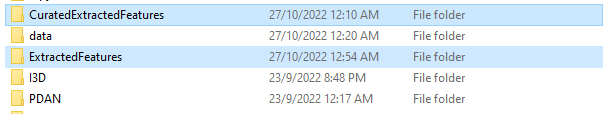

In [2]:
onlyfiles = [f for f in listdir("./ExtractedFeatures") if isfile(join("./ExtractedFeatures", f))]

f2 = open(".//data/smarthome_CS_51.json")
data = json.load(f2)

diction = {}
RGBCount = 0

for i in onlyfiles:
  if i.__contains__("_rgb"):
    j = i.replace("_rgb","")
    shutil.copyfile("./ExtractedFeatures/"+i, "./CuratedExtractedFeatures/"+j)
    j = j.replace(".npy","")
    diction[j] = data.get(j)
    RGBCount += 1
print("Total RGB files extracted: " + str(RGBCount))
f2.close()

Total RGB files extracted: 536


## Compiling the Curated Extracted Features into a JSON 

The following cell will compile the curated features into a JSON object for training purposes.
1. Ensure that the folder named = "CuratedFeatures" exist in the current directory of the notebook
2. Ensure that the folder named = "data" exist in the current directory of the notebook

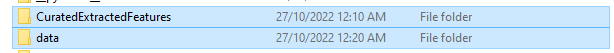

In [3]:
with open('./data/smarthome_CS_32.json', 'w', encoding='utf-8') as f:
    json.dump(diction, f, ensure_ascii=False)
print("Smarthome_CS_32.json has been generated")

Smarthome_CS_32.json has been generated


## Training the Model

The following cell will train the model.
1. Ensure that the folder named = "TrainedModel" exist in the current directory of the notebook and it is empty.
<br></br>

2. Mode {Unique Values}
	1. **There is 4 different modes RGB, FLOW, RGB+FLOW or FLOW+RGB**
<br></br>

3. Train {Boolean}
	1. **Determine if this is a training or testing.**
<br></br>

4. Epoch {Int}
	1.  **Defined as the total number of iterations of all the training data in one cycle for training the machine learning model.**
<br></br>

5. Batch Size {Int}
	1. **Defined as the number of training examples utilized in one iteration.**
<br></br>

6. Output {Folder}
	1. **This is the path of the output folder.**
<br></br>

In [4]:
#Display Train Dropdown Menu
Train = widgets.Dropdown(
    options=[True, False],
    value=True,
    description='Train:',
    disabled=False,
)
display(Train)

#Display Mode Dropdown Menu
Mode = widgets.Dropdown(
    options=['rgb', 'flow', 'flow+rgb', 'rgb+flow'],
    value='rgb',
    description='Mode:',
    disabled=False,
)
display(Mode)

#Display Epoch Dropdown Menu
epoch = widgets.IntText(
    value=140,
    description='Epoch:',
    disabled=False
)
display(epoch)

#Display Batch Size Dropdown Menu
batchsize = widgets.IntText(
    value=1,
    description='Batch Size:',
    disabled=False
)
display(batchsize)

#Display Output Dropdown Menu
fileList = [ name for name in os.listdir() if os.path.isdir(os.path.join(name)) ]
output = widgets.Dropdown(
    options=fileList,
    value=fileList[0],
    description='Output:',
    disabled=False,
)
display(output)


Dropdown(description='Train:', options=(True, False), value=True)

Dropdown(description='Mode:', options=('rgb', 'flow', 'flow+rgb', 'rgb+flow'), value='rgb')

IntText(value=140, description='Epoch:')

IntText(value=1, description='Batch Size:')

Dropdown(description='Output:', options=('.ipynb_checkpoints', 'CuratedExtractedFeatures', 'data', 'ExtractedF…

In [ ]:
%run ./train.py \
-dataset TSU \
-mode $Mode.value \
-split_setting CS \
-model PDAN \
-train $Train.value \
-num_channel 512 \
-lr 0.0002 \
-kernelsize 3 \
-APtype map \
-epoch $epoch.value \
-batch_size $batchsize.value \
-comp_info TSU_CS_RGB_PDAN \
-load_model ./PreTrainedModel/PDAN_TSU_RGB\
-rgb_root ./CuratedExtractedFeatures \
-featurePath ./data/smarthome_CS_32.json \
-outputTrain ./$output.value

Random_SEED!!!: 0
PDAN
batch_size: 1
cuda_avail True
RGB mode ./CuratedExtractedFeatures


100%|███████████████████████████████████████████████████████████████████████████████| 536/536 [00:02<00:00, 258.35it/s]
C:\SIT\3104\Project\Toyota_Smarthome\Toyota_Smarthome\pipline\models.py:88: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(self.key_conv.weight, mode='fan_out')
C:\SIT\3104\Project\Toyota_Smarthome\Toyota_Smarthome\pipline\models.py:89: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(self.value_conv.weight, mode='fan_out')
C:\SIT\3104\Project\Toyota_Smarthome\Toyota_Smarthome\pipline\models.py:90: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(self.query_conv.weight, mode='fan_out')
C:\SIT\3104\Project\Toyota_Smarthome\Toyota_Smarthome\pipline\models.py:91: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(self.rel_t, 0, 1)
C:\Users\Iva

you are processing PDAN
loaded ./PreTrainedModel/PDAN_TSU_RGB
pytorch_total_params 5804083
num_channel: 512 input_channnel: 1024 num_classes: 51
0.0002
Epoch 0/139
----------


C:\Users\Ivan\anaconda3\envs\ICT3104ProjectV2\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\Ivan\anaconda3\envs\ICT3104ProjectV2\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
C:\SIT\3104\Project\Toyota_Smarthome\Toyota_Smarthome\pipline\apmeter.py:108: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  rg = torch.range(1, self.scores.size(0)).float()
C:\SIT\3104\Project\Toyota_Smarthome\Toyota_Smarthome\pipline\apmeter.py:137: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. 

train-map: tensor(9.8869)
val-map: tensor(16.5168)
tensor([1.1972e+01, 3.0616e+01, 1.7229e+01, 1.7539e+01, 1.1485e+01, 2.1969e+01,
        1.3690e+00, 1.3868e+01, 1.0248e+01, 4.6521e+00, 3.8317e+00, 1.4634e+00,
        1.7783e+00, 1.2547e+01, 6.1627e+00, 3.1073e+00, 2.0363e+00, 2.6740e+01,
        2.4234e+00, 4.8690e+01, 4.6795e+00, 2.4432e+01, 4.5756e+01, 2.9619e+00,
        2.5070e-01, 2.3711e+01, 2.9331e+01, 2.5821e+01, 1.9258e+01, 1.9900e+00,
        1.2503e+00, 1.1515e-02, 1.5967e+01, 9.9481e-01, 4.0834e+01, 9.1803e+01,
        1.6676e+01, 7.0062e+00, 1.1365e+01, 1.8268e+00, 3.3676e+01, 3.2861e+00,
        2.1312e+01, 6.5837e+01, 1.0723e+00, 3.5425e+01, 2.5642e+01, 2.6068e+01,
        1.3164e+01, 1.0485e+00, 1.7067e-01])
save here: ./TrainedModel/weight_epoch_0.0002_0
Epoch 1/139
----------
train-map: tensor(14.2305)
val-map: tensor(16.7313)
tensor([1.5841e+01, 3.7963e+01, 2.8964e+01, 2.5640e+01, 1.3994e+01, 2.6169e+01,
        2.4108e+00, 1.3921e+01, 1.4897e+01, 5.0872e+00, 4.263

train-map: tensor(38.2426)
val-map: tensor(23.6147)
tensor([2.7758e+01, 4.5090e+01, 3.9588e+01, 3.5866e+01, 2.3179e+01, 4.1024e+01,
        1.3590e+01, 2.5455e+01, 2.3803e+01, 7.1005e+00, 5.7391e+00, 4.6082e+00,
        3.2522e+00, 1.8880e+01, 3.4954e+01, 5.9290e+00, 4.7739e+00, 5.1577e+01,
        4.3527e+00, 5.6739e+01, 1.7444e+01, 4.5934e+01, 5.9663e+01, 5.8069e+00,
        2.2084e-01, 3.6658e+01, 2.9537e+01, 3.1656e+01, 3.2344e+01, 5.1864e+00,
        2.5962e+00, 2.7776e-02, 3.6746e+01, 1.7689e+00, 2.2646e+01, 3.0642e+01,
        2.3525e+00, 1.2923e+00, 6.6781e+00, 1.0058e+00, 6.0361e+01, 2.0894e+01,
        2.7621e+01, 7.6293e+01, 7.1693e-01, 6.2981e+01, 6.4064e+01, 3.4132e+01,
        1.1470e+01, 1.2035e+00, 1.1490e+00])
Epoch 12/139
----------
train-map: tensor(38.7473)
val-map: tensor(26.8895)
tensor([3.0250e+01, 4.4892e+01, 4.1598e+01, 3.8915e+01, 2.1238e+01, 3.9942e+01,
        2.7839e+01, 2.5935e+01, 2.1757e+01, 7.0798e+00, 5.4913e+00, 8.5571e+00,
        3.4214e+00, 2.0509e

train-map: tensor(58.0136)
val-map: tensor(28.7431)
tensor([3.3851e+01, 4.6674e+01, 4.7219e+01, 4.3261e+01, 3.0049e+01, 4.5764e+01,
        3.5882e+01, 2.6756e+01, 2.4656e+01, 8.8031e+00, 6.6999e+00, 7.7960e+00,
        2.4055e+00, 2.5288e+01, 4.0851e+01, 1.3233e+01, 1.2475e+01, 6.5849e+01,
        5.2008e+00, 6.5031e+01, 1.9701e+01, 5.0652e+01, 5.8592e+01, 4.4573e+00,
        4.0033e-01, 3.7875e+01, 3.0364e+01, 3.3303e+01, 3.1932e+01, 6.2955e+00,
        3.4069e+00, 3.7883e-02, 4.1610e+01, 1.7878e+00, 2.9434e+01, 8.5372e+01,
        1.4722e+01, 1.7375e+01, 1.9649e+01, 4.6031e+00, 6.2612e+01, 3.7705e+01,
        2.5614e+01, 7.7734e+01, 9.2457e-01, 7.0315e+01, 7.0392e+01, 3.0420e+01,
        7.5760e+00, 2.3054e+00, 9.8354e-01])
Epoch 23/139
----------
train-map: tensor(59.7972)
val-map: tensor(29.1526)
tensor([3.2982e+01, 4.6867e+01, 4.9639e+01, 4.2936e+01, 3.8523e+01, 4.7032e+01,
        4.0606e+01, 2.6968e+01, 2.4661e+01, 8.4985e+00, 6.7385e+00, 1.2912e+01,
        1.5517e+00, 2.4948e

In [9]:
%run ./train.py \
-dataset TSU \
-mode rgb \
-split_setting CS \
-model PDAN \
-train False \
-num_channel 512 \
-lr 0.0002 \
-kernelsize 3 \
-APtype map \
-epoch 140 \
-batch_size 1 \
-comp_info TSU_CS_RGB_PDAN \
-load_model './TrainedModelPDAN/model_epoch_0.0002_32' \
-rgb_root ./CuratedExtractedFeatures \
-featurePath ./data/smarthome_CS_32.json 

Random_SEED!!!: 0
PDAN
batch_size: 1
cuda_avail True
RGB mode ./CuratedExtractedFeatures


100%|███████████████████████████████████████████████████████████████████████████████| 536/536 [00:01<00:00, 366.04it/s]
